In [1]:
import pandas as pd
import sys
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
import os

# Precinct Shapefile

## VEST's Documentation File

Election results from OpenElections.
Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release, with the exception of Geary, Johnson, and Riley Counties, which came from the counties. Significant changes based on county-sourced PDF maps in Douglas, Ellis, Harvey, Leavenworth, Lyon, Meade, Nemaha, Reno, and Stevens Counties. Precincts in Syracuse, Hamilton County based on voter file geocoding.

- G16PREDCLI - Hillary Clinton (Democratic Party)
- G16PRERTRU - Donald J. Trump (Republican Party)
- G16PRELJOH - Gary Johnson (Libertarian Party)
- G16PREGSTE - Jill Stein (Green Party)
- G16PREOTH - Write-in Votes


- G16USSDWIE - Patrick Wiesner (Democratic Party)
- G16USSRMOR - Jerry Moran (Republican Party)
- G16USSLGAR - Robert Garrard (Libertarian Party)
- G16USSOTH - Write-in Votes


## Load VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw-from-source/VEST/ks_2016/ks_2016.shp")

In [3]:
vest_shp.shape

(4027, 12)

In [4]:
vest_shp.head(1)

,COUNTYFP,NAMELSAD,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOTH,G16USSDWIE,G16USSRMOR,G16USSLGAR,G16USSOTH,geometry
0,001,Carlyle Township Voting District,35,112,4,3,0,25,128,5,0,"POLYGON Z ((-95.42748 37.96487 0.00000, -95.42..."


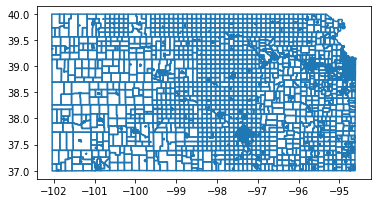

In [5]:
vest_shp.boundary.plot()

# Loading, Combining Election Results

## Load County Fips File

In [6]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Kansas"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
fips_dict = dict(zip(fips_file["County Name"].str.lower(),fips_file["FIPS County"]))

## Election Results

### President

In [7]:
results = pd.ExcelFile('./raw-from-source/SOS/2016_General_Election_President_Precinct_Level_Results.xlsx')

pres_df = pd.read_excel(results)

In [8]:
pres_df['VTD'].isna().sum()

0

In [9]:
pres_df = pres_df.pivot_table(index = ['County','Precinct','VTD'],
                         columns = ['Race','Candidate'],
                        values = ['Votes'],
                         aggfunc = 'sum')
pres_df.reset_index(inplace=True)
pres_df.head()

County                Precinct     VTD                      Votes  \
Race                                             President / Vice President   
Candidate                                               Basiago, Andrew D.    
0          ALLEN        Carlyle Township  000010                        0.0   
1          ALLEN  Cottage Grove Township  000020                        0.0   
2          ALLEN     Deer Creek Township  000030                        0.0   
3          ALLEN                East Elm  000040                        0.0   
4          ALLEN         Geneva Township  000050                        0.0   

                                                       \
Race                                                    
Candidate Castle, Darrell L  Clinton, Hillary Rodham    
0                        0.0                     35.0   
1                        0.0                     19.0   
2                        0.0                      9.0   
3                        0.0                     58.0   
4                        0.0                     10.0   

                                                                            \
Race                                                                         
Candidate De La Fuente, "Rocky" Roque   Giordani, Rocky   Hedges, James A    
0                                   0.0               0.0              0.0   
1                                   0.0               0.0              0.0   
2                                   0.0               0.0              0.0   
3                                   0.0               0.0              0.0   
4                                   0.0               0.0              0.0   

                           ...                                          \
Race                       ...                                           
Candidate Hoefling, Tom    ... Schoenke, Marshall R.  Schriner, Joe C    
0                     0.0  ...                    0.0              0.0   
1                     0.0  ...                    0.0              0.0   
2                     0.0  ...                    0.0              0.0   
3                     0.0  ...                    0.0              0.0   
4                     0.0  ...                    0.0              0.0   

                                                                       \
Race                                                                    
Candidate Smith, Mike   Sood, Ajay   Stein, Jill   Sterling, Shawna     
0                   0.0          0.0           3.0                0.0   
1                   0.0          0.0           0.0                0.0   
2                   0.0          0.0           1.0                0.0   
3                   0.0          0.0           4.0                0.0   
4                   0.0          0.0           2.0                0.0   

                                                                        \
Race                                                                     
Candidate Trump, Donald J.  Valdivia, Anthony J  Vogel-Walcutt, J.J.     
0                     112.0                  0.0                   0.0   
1                     110.0                  0.0                   0.0   
2                      46.0                  0.0                   0.0   
3                     197.0                  0.0                   0.0   
4                      44.0                  0.0                   0.0   

                                        
Race                                    
Candidate Wysinger, Demetra Jefferson   
0                                  0.0  
1                                  0.0  
2                                  0.0  
3                                  0.0  
4                                  0.0  

[5 rows x 28 columns]

In [10]:
pres_df.columns.to_list()

[('County', '', ''),
 ('Precinct', '', ''),
 ('VTD', '', ''),
 ('Votes', 'President / Vice President', 'Basiago, Andrew D. '),
 ('Votes', 'President / Vice President', 'Castle, Darrell L '),
 ('Votes', 'President / Vice President', 'Clinton, Hillary Rodham '),
 ('Votes', 'President / Vice President', 'De La Fuente, "Rocky" Roque  '),
 ('Votes', 'President / Vice President', 'Giordani, Rocky  '),
 ('Votes', 'President / Vice President', 'Hedges, James A '),
 ('Votes', 'President / Vice President', 'Hoefling, Tom  '),
 ('Votes', 'President / Vice President', 'Johnson, Gary  '),
 ('Votes', 'President / Vice President', 'Kahn, Lynn  '),
 ('Votes', 'President / Vice President', 'La Riva, Gloria  '),
 ('Votes', 'President / Vice President', 'Levinson, Michael S. '),
 ('Votes', 'President / Vice President', 'Maturen, Michael A '),
 ('Votes', 'President / Vice President', 'McMullin, Evan  '),
 ('Votes', 'President / Vice President', 'Moorehead, Monica G. '),
 ('Votes', 'President / Vice Presid

In [11]:
pres_df.columns = ['county','precinct','vtd'] + pres_df.columns.droplevel(0).droplevel(0)[3:].to_list()
pres_df.columns

Index(['county', 'precinct', 'vtd', 'Basiago, Andrew D. ',
       'Castle, Darrell L ', 'Clinton, Hillary Rodham ',
       'De La Fuente, "Rocky" Roque  ', 'Giordani, Rocky  ',
       'Hedges, James A ', 'Hoefling, Tom  ', 'Johnson, Gary  ',
       'Kahn, Lynn  ', 'La Riva, Gloria  ', 'Levinson, Michael S. ',
       'Maturen, Michael A ', 'McMullin, Evan  ', 'Moorehead, Monica G. ',
       'Perry, Darryl  ', 'Schoenke, Marshall R. ', 'Schriner, Joe C ',
       'Smith, Mike  ', 'Sood, Ajay  ', 'Stein, Jill  ', 'Sterling, Shawna  ',
       'Trump, Donald J. ', 'Valdivia, Anthony J ', 'Vogel-Walcutt, J.J.  ',
       'Wysinger, Demetra Jefferson '],
      dtype='object')

In [12]:
pres_df.rename(columns = {'Clinton, Hillary Rodham ':'G16PREDCLI',
                          'Trump, Donald J. ':'G16PRERTRU',
                          'Johnson, Gary  ':'G16PRELJOH',
                          'Stein, Jill  ':'G16PREGSTE'}, inplace = True)

In [39]:
[x for x in pres_df.columns if x not in ['county','precinct','vtd'] and 'G16' not in x]

['Basiago, Andrew D. ',
 'Castle, Darrell L ',
 'De La Fuente, "Rocky" Roque  ',
 'Giordani, Rocky  ',
 'Hedges, James A ',
 'Hoefling, Tom  ',
 'Kahn, Lynn  ',
 'La Riva, Gloria  ',
 'Levinson, Michael S. ',
 'Maturen, Michael A ',
 'McMullin, Evan  ',
 'Moorehead, Monica G. ',
 'Perry, Darryl  ',
 'Schoenke, Marshall R. ',
 'Schriner, Joe C ',
 'Smith, Mike  ',
 'Sood, Ajay  ',
 'Sterling, Shawna  ',
 'Valdivia, Anthony J ',
 'Vogel-Walcutt, J.J.  ',
 'Wysinger, Demetra Jefferson ']

In [13]:
pres_df['G16PREOTH'] = pres_df[[x for x in pres_df.columns if x not in ['county','precinct','vtd'] and 'G16' not in x]].sum(axis = 1)

In [14]:
pres_df.head()

,county,precinct,vtd,"Basiago, Andrew D.","Castle, Darrell L",G16PREDCLI,"De La Fuente, ""Rocky"" Roque","Giordani, Rocky","Hedges, James A","Hoefling, Tom",...,"Schriner, Joe C","Smith, Mike","Sood, Ajay",G16PREGSTE,"Sterling, Shawna",G16PRERTRU,"Valdivia, Anthony J","Vogel-Walcutt, J.J.","Wysinger, Demetra Jefferson",G16PREOTH
0,ALLEN,Carlyle Township,000010,0.0,0.0,35.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,112.0,0.0,0.0,0.0,0.0
1,ALLEN,Cottage Grove Township,000020,0.0,0.0,19.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,1.0
2,ALLEN,Deer Creek Township,000030,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,46.0,0.0,0.0,0.0,0.0
3,ALLEN,East Elm,000040,0.0,0.0,58.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,197.0,0.0,0.0,0.0,2.0
4,ALLEN,Geneva Township,000050,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,44.0,0.0,0.0,0.0,0.0


### U.S. Senate

In [15]:
results = pd.ExcelFile('./raw-from-source/SOS/2016_General_Election_US_Senate_Precinct_Level_Results.xlsx')

uss_df = pd.read_excel(results)
uss_df = uss_df.pivot_table(index = ['County','Precinct','VTD'],
                         columns = ['Race','Candidate'],
                        values = ['Votes'],
                         aggfunc = 'sum')
uss_df.reset_index(inplace=True)
uss_df.head()

County                Precinct     VTD                Votes  \
Race                                             United States Senate   
Candidate                                         Garrard, Robert D.    
0          ALLEN        Carlyle Township  000010                    5   
1          ALLEN  Cottage Grove Township  000020                    4   
2          ALLEN     Deer Creek Township  000030                    8   
3          ALLEN                East Elm  000040                   13   
4          ALLEN         Geneva Township  000050                    5   

                                                         
Race                                                     
Candidate Moran, Jerry   Smith, DJ   Wiesner, Patrick    
0                    128           0                 25  
1                    110           0                 14  
2                     46           0                  8  
3                    199           0                 54  
4                     43           0                 10

In [16]:
uss_df.columns = ['county','precinct','vtd','G16USSLGAR','G16USSRMOR','G16USSOTH','G16USSDWIE']

In [17]:
uss_df.head()

,county,precinct,vtd,G16USSLGAR,G16USSRMOR,G16USSOTH,G16USSDWIE
0,ALLEN,Carlyle Township,000010,5,128,0,25
1,ALLEN,Cottage Grove Township,000020,4,110,0,14
2,ALLEN,Deer Creek Township,000030,8,46,0,8
3,ALLEN,East Elm,000040,13,199,0,54
4,ALLEN,Geneva Township,000050,5,43,0,10


### Combine SOS Results

In [18]:
display(pres_df.shape)
display(uss_df.shape)

(2723, 29)

(2724, 7)

In [19]:
election_results = pres_df.merge(uss_df, how = 'outer', on = ['county','precinct','vtd'])

In [20]:
election_results['COUNTYFP'] = election_results['county'].str.lower().map(fips_dict)

In [21]:
election_results

,county,precinct,vtd,"Basiago, Andrew D.","Castle, Darrell L",G16PREDCLI,"De La Fuente, ""Rocky"" Roque","Giordani, Rocky","Hedges, James A","Hoefling, Tom",...,G16PRERTRU,"Valdivia, Anthony J","Vogel-Walcutt, J.J.","Wysinger, Demetra Jefferson",G16PREOTH,G16USSLGAR,G16USSRMOR,G16USSOTH,G16USSDWIE,COUNTYFP
0,ALLEN,Carlyle Township,000010,0.0,0.0,35.0,0.0,0.0,0.0,0.0,...,112.0,0.0,0.0,0.0,0.0,5.0,128.0,0.0,25.0,001
1,ALLEN,Cottage Grove Township,000020,0.0,0.0,19.0,0.0,0.0,0.0,0.0,...,110.0,0.0,0.0,0.0,1.0,4.0,110.0,0.0,14.0,001
2,ALLEN,Deer Creek Township,000030,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,46.0,0.0,0.0,0.0,0.0,8.0,46.0,0.0,8.0,001
3,ALLEN,East Elm,000040,0.0,0.0,58.0,0.0,0.0,0.0,0.0,...,197.0,0.0,0.0,0.0,2.0,13.0,199.0,0.0,54.0,001
4,ALLEN,Geneva Township,000050,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,44.0,0.0,0.0,0.0,0.0,5.0,43.0,0.0,10.0,001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2728,MIAMI,Osawatomie Ward 1 H5,120060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.0,137.0,0.0,77.0,121
2729,MIAMI,Spring Hill City Exclave A,00023B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,48.0,541.0,0.0,193.0,121
2730,SEWARD,Liberal Township 1 Exclave,00005B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,175
2731,SEWARD,Liberal Township 4 Exclave,00008B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,175


In [22]:
election_results.shape

(2733, 34)

In [23]:
vest_shp.shape

(4027, 12)

### Load in election results from OpenElections for counties missing in SOS results

In [24]:
election_results['county'].nunique()

101

Johnson, Sedgwick, Shawnee and Wyandotte counties are missing from SOS results. 

In [25]:
open_df = pd.read_csv('./raw-from-source/OpenElections/20161108__ks__general__precinct.csv')

open_df = open_df[open_df['office'].isin(['President','U.S. Senate'])]
open_df = open_df[open_df['county'].isin(['Wyandotte','Johnson','Sedgwick','Shawnee'])]
open_df = open_df.pivot_table(index = ['county','precinct'],
                         columns = ['office','candidate'],
                        values = ['votes'],
                         aggfunc = 'sum')
open_df.reset_index(inplace=True)
display(open_df.head(5))
display(open_df.columns.to_list())

county        precinct                 votes               \
office                                         President                
candidate                          Darrell Castle (incl) Donald Trump   
0          Johnson  Aubry Twp 0-01                   NaN         90.0   
1          Johnson  Aubry Twp 0-02                   NaN        536.0   
2          Johnson  Aubry Twp 0-03                   NaN        283.0   
3          Johnson  Aubry Twp 0-04                   NaN        716.0   
4          Johnson  Aubry Twp 0-05                   NaN          9.0   

                                                                        \
office                                                                   
candidate Evan McMullin (incl) Gary Johnson Hillary Clinton Jill Stein   
0                          NaN          3.0            37.0        0.0   
1                          NaN         44.0           246.0        6.0   
2                          NaN         20.0           153.0        7.0   
3                          NaN         48.0           312.0       13.0   
4                          NaN          0.0             8.0        0.0   

                                                                   \
office              U.S. Senate                                     
candidate Write-ins Jerry Moran Patrick Wiesner Robert D. Garrard   
0               1.0        93.0            30.0               7.0   
1              23.0       598.0           186.0              55.0   
2               4.0       295.0           131.0              25.0   
3              26.0       754.0           266.0              72.0   
4               2.0        13.0             4.0               1.0   

                                    
office                              
candidate Robert Garrard Write-ins  
0                    NaN       0.0  
1                    NaN       1.0  
2                    NaN       0.0  
3                    NaN       1.0  
4                    NaN       0.0

[('county', '', ''),
 ('precinct', '', ''),
 ('votes', 'President', 'Darrell Castle (incl)'),
 ('votes', 'President', 'Donald Trump'),
 ('votes', 'President', 'Evan McMullin (incl)'),
 ('votes', 'President', 'Gary Johnson'),
 ('votes', 'President', 'Hillary Clinton'),
 ('votes', 'President', 'Jill Stein'),
 ('votes', 'President', 'Write-ins'),
 ('votes', 'U.S. Senate', 'Jerry Moran'),
 ('votes', 'U.S. Senate', 'Patrick Wiesner'),
 ('votes', 'U.S. Senate', 'Robert D. Garrard'),
 ('votes', 'U.S. Senate', 'Robert Garrard'),
 ('votes', 'U.S. Senate', 'Write-ins')]

In [26]:
open_df.columns = ['county','precinct'] + open_df.columns.droplevel(0).droplevel(0)[2:].to_list()
open_df['Robert Garrard'] = open_df['Robert Garrard'].fillna(0)
open_df['Robert D. Garrard'] = open_df['Robert D. Garrard'].fillna(0)
open_df['Robert Garrard'] = open_df['Robert Garrard'] + open_df['Robert D. Garrard']
open_df.drop(columns = ['Robert D. Garrard'], inplace = True)
open_df.columns

Index(['county', 'precinct', 'Darrell Castle (incl)', 'Donald Trump',
       'Evan McMullin (incl)', 'Gary Johnson', 'Hillary Clinton', 'Jill Stein',
       'Write-ins', 'Jerry Moran', 'Patrick Wiesner', 'Robert Garrard',
       'Write-ins'],
      dtype='object')

In [27]:
open_df.columns = ['county','precinct','Castle','G16PRERTRU','McMullin','G16PRELJOH','G16PREDCLI','G16PREGSTE','G16PREOTH',
                   'G16USSRMOR','G16USSDWIE','G16USSLGAR','G16USSOTH']
open_df.head()

,county,precinct,Castle,G16PRERTRU,McMullin,G16PRELJOH,G16PREDCLI,G16PREGSTE,G16PREOTH,G16USSRMOR,G16USSDWIE,G16USSLGAR,G16USSOTH
0,Johnson,Aubry Twp 0-01,NaN,90.0,NaN,3.0,37.0,0.0,1.0,93.0,30.0,7.0,0.0
1,Johnson,Aubry Twp 0-02,NaN,536.0,NaN,44.0,246.0,6.0,23.0,598.0,186.0,55.0,1.0
2,Johnson,Aubry Twp 0-03,NaN,283.0,NaN,20.0,153.0,7.0,4.0,295.0,131.0,25.0,0.0
3,Johnson,Aubry Twp 0-04,NaN,716.0,NaN,48.0,312.0,13.0,26.0,754.0,266.0,72.0,1.0
4,Johnson,Aubry Twp 0-05,NaN,9.0,NaN,0.0,8.0,0.0,2.0,13.0,4.0,1.0,0.0


In [28]:
open_df.dtypes

county         object
precinct       object
Castle        float64
G16PRERTRU    float64
McMullin      float64
G16PRELJOH    float64
G16PREDCLI    float64
G16PREGSTE    float64
G16PREOTH     float64
G16USSRMOR    float64
G16USSDWIE    float64
G16USSLGAR    float64
G16USSOTH     float64
dtype: object

### Combine SOS with OpenElections Results

In [29]:
open_df.shape

(1180, 13)

In [30]:
election_results.shape

(2733, 34)

In [31]:
election_results = pd.concat([election_results, open_df], ignore_index = True)

In [32]:
election_results['COUNTYFP'] = election_results['county'].str.lower().map(fips_dict)

In [33]:
election_results.sample(5)

,county,precinct,vtd,"Basiago, Andrew D.","Castle, Darrell L",G16PREDCLI,"De La Fuente, ""Rocky"" Roque","Giordani, Rocky","Hedges, James A","Hoefling, Tom",...,"Vogel-Walcutt, J.J.","Wysinger, Demetra Jefferson",G16PREOTH,G16USSLGAR,G16USSRMOR,G16USSOTH,G16USSDWIE,COUNTYFP,Castle,McMullin
3584,Shawnee,W 03 P 06,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,13.0,57.0,1.0,109.0,177,NaN,NaN
821,ELLIS,East Big Creek Township,000030,0.0,0.0,60.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16.0,371.0,0.0,39.0,051,NaN,NaN
1024,GEARY,Milford Township,000270,0.0,3.0,120.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,26.0,409.0,0.0,104.0,061,NaN,NaN
1034,GEARY,Wingfield Township,000040,0.0,0.0,22.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,74.0,0.0,26.0,061,NaN,NaN
493,COWLEY,Liberty Township,000250,0.0,0.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,68.0,0.0,12.0,035,NaN,NaN


In [34]:
election_results.shape

(3913, 36)

In [35]:
vest_shp.shape

(4027, 12)

# Validating Election Results

## Statewide

In [36]:
vest_shp.columns

Index(['COUNTYFP', 'NAMELSAD', 'G16PREDCLI', 'G16PRERTRU', 'G16PRELJOH',
       'G16PREGSTE', 'G16PREOTH', 'G16USSDWIE', 'G16USSRMOR', 'G16USSLGAR',
       'G16USSOTH', 'geometry'],
      dtype='object')

In [37]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))


data_columns = ['G16PREDCLI', 'G16PRERTRU', 'G16PRELJOH',
       'G16PREGSTE', 'G16PREOTH', 'G16USSDWIE', 'G16USSRMOR', 'G16USSLGAR',
       'G16USSOTH']

statewide_totals_check(vest_shp, election_results, data_columns)


***Statewide Totals Check***
G16PREDCLI is equal 	VEST / RDH: 427005
G16PRERTRU is equal 	VEST / RDH: 671018
G16PRELJOH is equal 	VEST / RDH: 55406
G16PREGSTE is equal 	VEST / RDH: 23506
G16PREOTH has a difference of 328.0 votes
	VEST: 16750 votes
	SOURCES: 16422.0 votes
G16USSDWIE is equal 	VEST / RDH: 379740
G16USSRMOR is equal 	VEST / RDH: 732376
G16USSLGAR is equal 	VEST / RDH: 65760
G16USSOTH is equal 	VEST / RDH: 619


We check against the Official Results from the KS SOS [here](https://www.sos.ks.gov/elections/16elec/2016_General_Election_Official_Results.pdf). 

The majority of votes for G16PREOTH are coming from OpenElections. According to the SOS vote totals, there were only 7,197 votes for other presidential candidates. We cannot confirm the source of the Other votes for G16 Pres from OpenElections. We cannot validate the VEST results, because they differ from the SOS and from [Ballotpedia](https://ballotpedia.org/Presidential_election_in_Kansas,_2016). However, we do not have access to the precinct-level SOS results to verify that there were not more than 7,197 write-in votes. 

## County-by-county

In [38]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")

                    
county_totals_check(vest_shp,election_results,data_columns,'COUNTYFP')

***Countywide Totals Check***

G16PREDCLI is equal across all counties
G16PRERTRU is equal across all counties
G16PRELJOH is equal across all counties
G16PREGSTE is equal across all counties
G16PREOTH contains differences in these counties:
	121 has a difference of 24.0 votes
		VEST: 110 votes
		SOURCES: 86.0 votes
	177 has a difference of 341.0 votes
		VEST: 2083 votes
		SOURCES: 1742.0 votes
	191 has a difference of -37.0 votes
		VEST: 0 votes
		SOURCES: 37.0 votes
G16USSDWIE is equal across all counties
G16USSRMOR is equal across all counties
G16USSLGAR is equal across all counties
G16USSOTH is equal across all counties


## Precinct-by-precinct

VEST performed the following modifications in order to join the files: 
```
Significant changes based on county-sourced PDF maps in Douglas, Ellis, Harvey, Leavenworth, Lyon, Meade, Nemaha, Reno, and Stevens Counties. Precincts in Syracuse, Hamilton County based on voter file geocoding.
```

We are not going to validate the precinct by precinct election results at this time, as there is a difference of 4,027 precincts in the VEST file and 3,913 in the sos election results, and the county by county election results match. 